# Исследовательский анализ заведений общественного питания в Москве


Автор: Алена Свиридова (GitHub - AlenaCarp)

### Цели и задачи проекта

Провести ИАД рынка общественного питания Москвы.

Выделить типы заведений.

Исследовать рейтинг заведений.

Определить популярные заведения в Москве.

Определить тип заведения общественного питания в Москве подходящее для инвесторов и определить место для этого заведения.

### Описание данных

Две таблицы: rest_info.csv и rest_price.csv

rest_info.csv - Информация о заведениях общественного питания. 8406 строк 9 столбцов. hours и seats содержат пропуски.

rest_price.csv - Информация о среднем чеке. 4058 строк 5 столбцов. price, avg_bill, middle_avg_bill, middle_coffee_cup содержат пропуски.

### Содержимое проекта
   1. [Загрузка данных и знакомство с ними](#1-bullet)
   2. [Предобработка данных](#2-bullet)
   3. [Исследовательский анализ данных](#3-bullet)
   4. [Итоговый вывод и рекомендации](#4-bullet)
---

<a class="anchor" id="1-bullet"></a>
## 1. Загрузка данных и знакомство с ними

In [1]:
!pip install phik

In [2]:
# Библиотеки
import phik as phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder

In [3]:
df_info= pd.read_csv('/путь_к_файлу/rest_info.csv')
df_price= pd.read_csv('/путь_к_файлу/rest_price.csv')

Обзор на rest_info.csv:

In [4]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
df_info.head(10)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0


In [6]:
df_info['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

<AxesSubplot:>

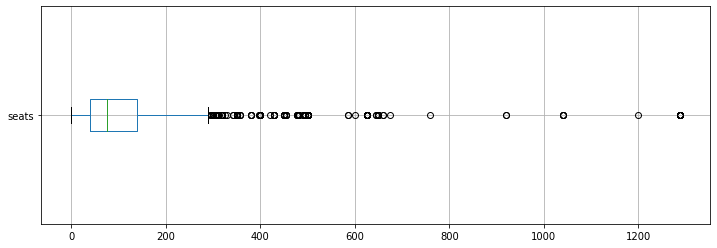

In [7]:
df_info.boxplot(column='seats',vert=False, figsize=(12, 4))

Обзор на rest_price.csv

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [9]:
df_price.head(10)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


---

### Промежуточный вывод

**Данные в rest_info.csv:**

Названия привести к нижнему регистру.

Больше половины столбца seats содержит пропуски. 

Изменить тип столбца seats на int8.

Есть пропуски в hours.

Поменять chain на int16.

В столбце seats много очень больших значений (на уровне банкетных залов), точечное уточнение в поисковике показывало другие цифры (~40 сидячих мест), что вызвало подозрение в правдивости данных. Если заказчик не рассматривает "банкетный зал" как вариант для первой попытки бизнеса в сфере общественного питания, то стоит определить все значения выше 300 как выбросы.

**Данные в rest_price.csv:**

Много пропусков в данных.

Эта таблица в 2 раза меньше предыдущей, информация о средних чеках не полная.

### Подготовка единого датафрейма

- Объединим данные 2-х датасетов

In [10]:
df_info_price = df_info.merge(df_price, on = 'id' ,how = 'left')

In [11]:
df_info_price.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [12]:
df_info_price.shape

(8406, 13)

<a class="anchor" id="2-bullet"></a>
## 2. Предобработка данных

- Поменяем типы данных у:

In [13]:
df_info_price['chain'] = df_info_price['chain'].astype('bool')

In [14]:
df_info_price['seats'] = df_info_price['seats'].astype('Int16')

- Изучим пропущенные значения в данных

In [15]:
# Таблица с количеством и долей пропусков по каждому столбцу
nan_count = df_info_price.isna().sum().to_frame('Количество пропусков')
nan_count['Доля пропусков'] = (df_info_price.isna().mean() * 100).round(2)

# Отсортируем по доле пропусков
nan_count = nan_count.sort_values(by='Доля пропусков', ascending=False)

display(nan_count)

,Количество пропусков,Доля пропусков
middle_coffee_cup,7871,93.64
middle_avg_bill,5257,62.54
price,5091,60.56
avg_bill,4590,54.60
seats,3611,42.96
hours,536,6.38
id,0,0.00
name,0,0.00
category,0,0.00
address,0,0.00


Найдем количество уникальных сетевых магазинов которые не содержат средний чек:

In [16]:
df_info_price[(df_info_price['chain']==1) & (df_info_price['middle_avg_bill'].isna())]['name'].nunique()

597

 Найдем средний чек для сети и поставим в пропуски (тут важно учитывать как большие значения, так и маленькие, поэтому берем среднее). 

Так же заполним price. Для seats возьмем медину (на случай, если у сети есть очень большие помещения и очень маленькие. Большие значения в этом столбце не вызывают доверия). 

hours, если у сети нет вариативности по времени работы - можно заполнить. Если столбец будет участвовать в анализе, будем игнорировать строки с пропуском, не удаляем.

Столбец middle_coffee_cup не будет участвовать в анализе - оставляем без изменений.

Нормализуем данные:

In [17]:
df_info_price['name'] = df_info_price['name'].str.lower().str.replace('.',' ',regex=False).str.replace('_',' ',regex=False)
df_info_price['address'] = df_info_price['address'].str.lower().str.replace('.',' ',regex=False).str.replace('_',' ',regex=False)

Явные дубликаты:

In [18]:
dub_count = df_info_price.duplicated(subset=['name','address']).sum()
display(f"Явных дубликатов: {dub_count}")
df_info_price[df_info_price.duplicated(subset=['name','address'])]

'Явных дубликатов: 4'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,<NA>,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,False,276,NaN,NaN,NaN,NaN


Строка 215 не дубликат, по этому адресу 2 кафе с названием "кафе". Не удаляем ее.

Удалим явные дубликаты:

In [19]:
mask = (df_info_price.duplicated(subset=['name','address'])) & (df_info_price['name']!='кафе')
df_info_price = df_info_price[~mask]
df_info_price.shape

(8403, 13)

Ищем дубликаты без адреса и удаляем:

In [20]:
dub_count2 = df_info_price.duplicated(subset=['name','category','district','district','rating','hours','chain','seats']).sum()
display(f"Дубликатов: {dub_count2}")
df_info_price.drop_duplicates(subset=['name','category','district','district','rating','hours','chain','seats'],inplace=True)
df_info_price.shape

'Дубликатов: 54'

(8349, 13)

- Для дальнейшей работы создайем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
df_info_price['is_24_7'] = df_info_price['hours'].str.contains('ежедневно, круглосуточно',na=False)

In [22]:
df_info_price[['hours','is_24_7']].sum()

is_24_7    723
dtype: int64

---

### Промежуточный вывод


Удалено 58 дублекатов - 0,69% строк от изначального

Информации о стоимости мало, в middle_avg_bill более 50% пропусков. 

<a class="anchor" id="3-bullet"></a>
## 3. Исследовательский анализ данных

---

### Задача 1

Какие категории заведений представлены в данных? 

In [23]:
categorys = df_info_price.groupby('category')['id'].count().sort_values(ascending=False)
display(categorys)

category
кафе               2354
ресторан           2033
кофейня            1397
бар,паб             761
пиццерия            631
быстрое питание     603
столовая            314
булочная            256
Name: id, dtype: int64

In [24]:
# Преобразуем Series в DataFrame
df_categorys = pd.DataFrame({'Категория заведения':categorys.index, 'Количество':categorys.values})

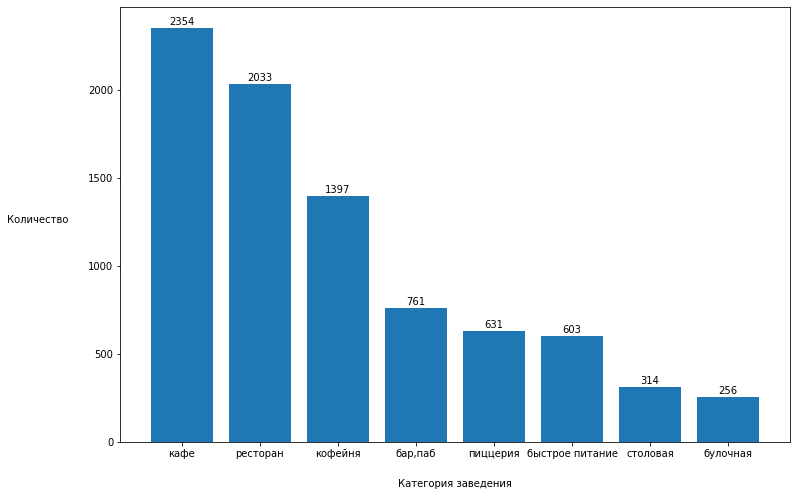

In [25]:
# Создание графика
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df_categorys['Категория заведения'], df_categorys['Количество'])

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Категория заведения', labelpad=20)
plt.ylabel('Количество', rotation=0, labelpad=50)
plt.show()

**Большая конкуренция среди кафе и ресторанов.**

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? 

In [26]:
# Группируем
districts = df_info_price.groupby('district')['id'].count().sort_values(ascending=False)
display(districts)

district
Центральный административный округ         2216
Северный административный округ             898
Северо-Восточный административный округ     889
Южный административный округ                884
Западный административный округ             843
Восточный административный округ            794
Юго-Восточный административный округ        711
Юго-Западный административный округ         706
Северо-Западный административный округ      408
Name: id, dtype: int64

In [27]:
# Преобразуем Series в DataFrame
df_districts = pd.DataFrame({'Район':districts.index, 'Количество':districts.values})

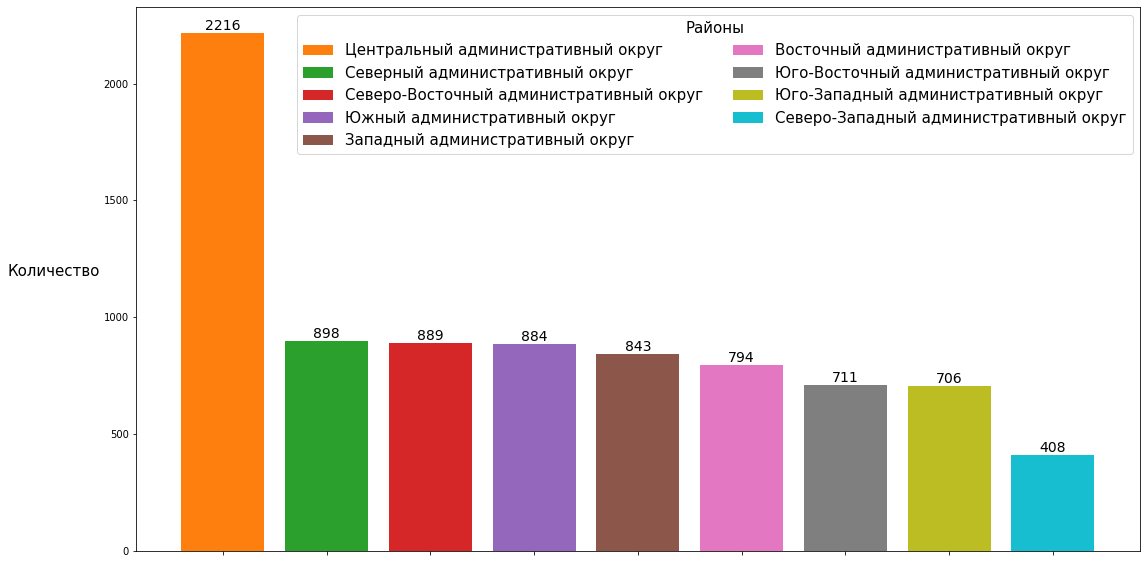

In [28]:
fig, ax = plt.subplots(figsize=(18, 10))

bars = ax.bar(df_districts['Район'], df_districts['Количество'])

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center',fontsize=14)

# Построение столбцов с label
for i, (district, count) in enumerate(df_districts.values):
    ax.bar(i, count, label=district)

ax.set_xticks(range(len(df_districts)))
ax.set_xticklabels([])  # убираем названия с оси

plt.ylabel('Количество', rotation=0, labelpad=50,fontsize=15)

# Легенда
plt.legend(
    title="Районы",
    title_fontsize=15,
    loc='upper right',
    fontsize=15,
    ncol=2 
)

plt.show()

In [29]:
df_cad = df_info_price[df_info_price['district']=='Центральный административный округ']
categorys_cad = df_cad.groupby('category')['id'].count().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_categorys_cad = pd.DataFrame({'Категория заведения':categorys_cad.index, 'Количество':categorys_cad.values})

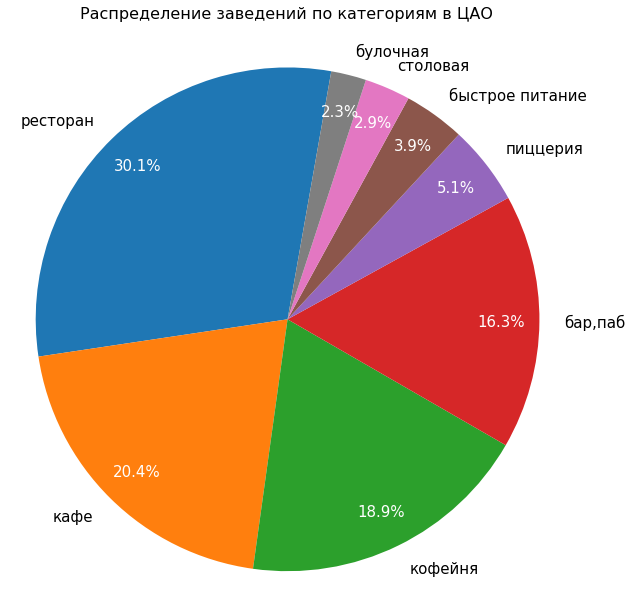

In [30]:
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(df_categorys_cad['Количество'],
        labels=df_categorys_cad['Категория заведения'],
        autopct='%1.1f%%',
        startangle=80,
        textprops={'fontsize': 15},
        pctdistance=0.85)
# Меняем цвет процентов
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Распределение заведений по категориям в ЦАО', fontsize=16,pad=30)
plt.axis('equal')

plt.show()

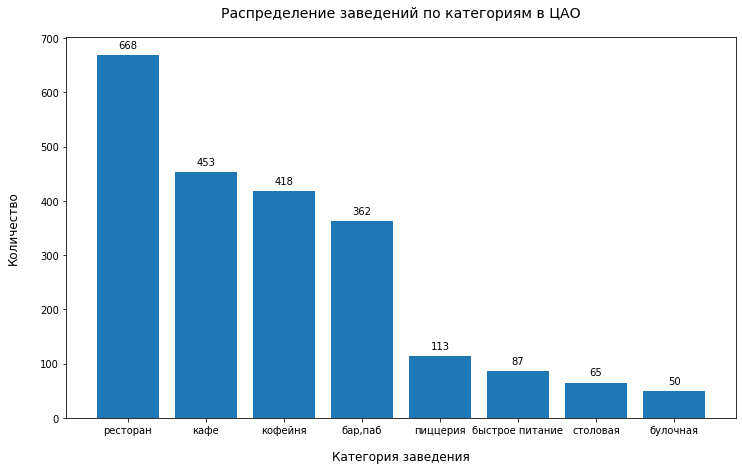

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.bar(df_categorys_cad['Категория заведения'], df_categorys_cad['Количество'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Категория заведения', fontsize=12, labelpad=15)
ax.set_ylabel('Количество', fontsize=12, labelpad=20)

plt.xticks(rotation=0)
plt.title('Распределение заведений по категориям в ЦАО', fontsize=14, pad=20)

plt.show()

**ЦАО копирует тенденцию всей Москвы: кафе и рестораны доминируют количеством. Булочные и столовые почти не присутствуют.
В ЦАО в 3 раза больше заведений чем в любом другом районе.**

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [32]:
chain = df_info_price.groupby('chain')['id'].count().sort_values(ascending=False)
# Преобразуем Series в DataFrame
df_chain = pd.DataFrame({'Тип заведения':chain.index, 'Количество':chain.values})

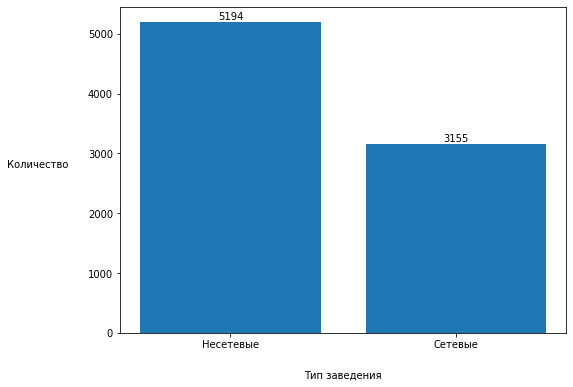

In [33]:
df_chain['Тип заведения'] = df_chain['Тип заведения'].map({True: 'Сетевые', False: 'Несетевые'})
# Создание графика
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(df_chain['Тип заведения'], df_chain['Количество'])

# Подписи
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center')

plt.xlabel('Тип заведения', labelpad=20)
plt.ylabel('Количество', rotation=0, labelpad=50)
plt.show()

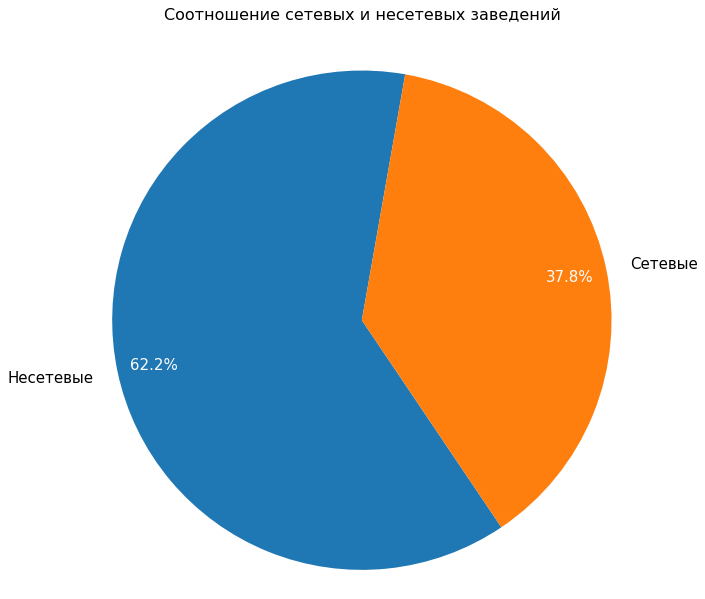

In [34]:
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(df_chain['Количество'],
        labels=df_chain['Тип заведения'],
        autopct='%1.1f%%',
        startangle=80,
        textprops={'fontsize': 15},
        pctdistance=0.85)
# Меняем цвет процентов
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Соотношение сетевых и несетевых заведений', fontsize=16,pad=30)
plt.axis('equal')

plt.show()

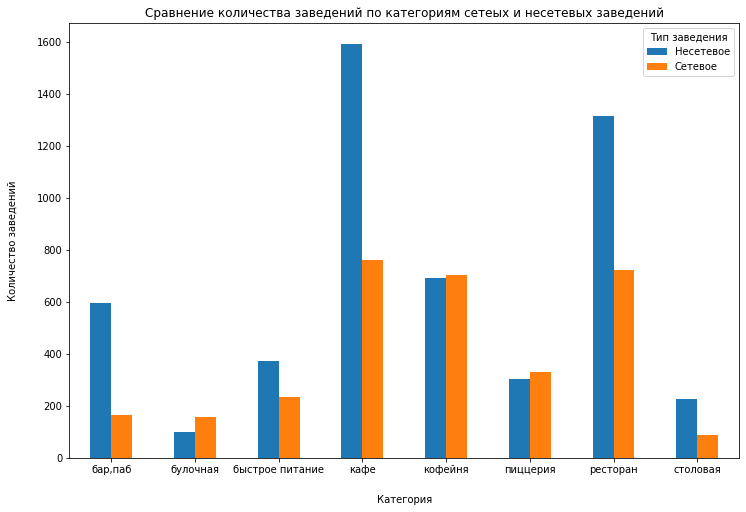

In [35]:
df_unstack = df_info_price.groupby('category')['chain'].value_counts().unstack(fill_value=0)

df_unstack.plot(kind='bar',figsize=(12,8),rot=0)

# Настраиваем график
plt.title('Сравнение количества заведений по категориям сетеых и несетевых заведений')
plt.ylabel('Количество заведений',labelpad=20)
plt.xlabel('Категория', labelpad=20, rotation=0)
plt.legend(title='Тип заведения',labels=['Несетевое','Сетевое'])

plt.show()

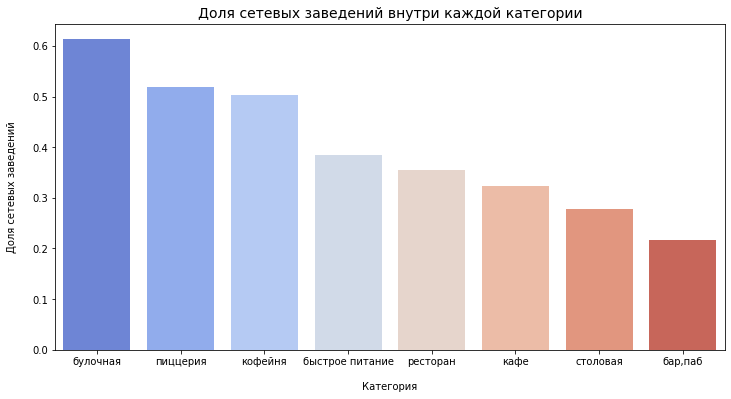

In [36]:
# Считаем доли
df_unstack['Доля_сетевых'] = df_unstack[True] / (df_unstack[True] + df_unstack[False])
# Сортируем
df_unstack = df_unstack.sort_values(by='Доля_сетевых', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_unstack.index, y=df_unstack['Доля_сетевых'], palette='coolwarm')

plt.title('Доля сетевых заведений внутри каждой категории', fontsize=14)
plt.ylabel('Доля сетевых заведений', labelpad=15)
plt.xlabel('Категория', labelpad=15)
plt.xticks(rotation=0)
plt.show()


**Несетевых почти в 2 раза больше. Сетевыми чаще сявляются кафе и рестораны.**

---

### Задача 4

Исследуем количество посадочных мест в заведениях.

<AxesSubplot:>

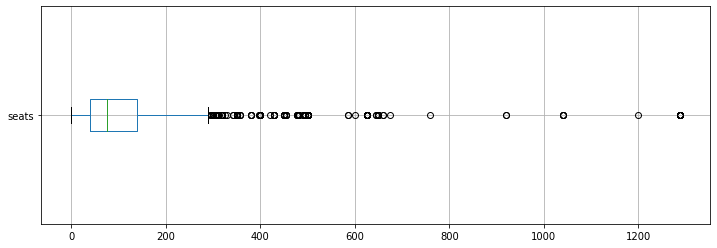

In [37]:
df_info_price.boxplot(column='seats',vert=False, figsize=(12, 4))

**В столбце seats много очень больших значений (на уровне банкетных залов), точечное уточнение в поисковике показывало другие цифры (~40 сидячих мест), что вызвало подозрение в правдивости данных. Если заказчик не рассматривает "банкетный зал" как вариант для первой попытки бизнеса в сфере общественного питания, то стоит определить все значения выше 300 как выбросы.**

In [38]:
print("Количество строк, где посадочных мест > 300: ",df_info_price[df_info_price['seats']>300].shape[0])
print("Доля от всех строк: ",round(df_info_price[df_info_price['seats']>300].shape[0]/df_info_price.shape[0],2))

Количество строк, где посадочных мест > 300:  251
Доля от всех строк:  0.03


Доля менее 10%. Доля достаточно мала, чтоб обозначить данные выбросами.

In [39]:
yes_300 = (df_info_price.groupby('category')['seats'].agg(Медиана_с_выбросами='median', Среднее_с_выбросами='mean'))
no_300 = (df_info_price[df_info_price['seats'] < 300].groupby('category')['seats'].agg(Медиана_без_выбросов='median', Среднее_без_выбросов='mean'))

all_seats = yes_300.merge(no_300, on='category', how='outer')
display(all_seats)

,Медиана_с_выбросами,Среднее_с_выбросами,Медиана_без_выбросов,Среднее_без_выбросов
category,,,,
"бар,паб",82.5,124.61588,77.5,88.895735
булочная,50.0,89.385135,48.0,76.661972
быстрое питание,65.0,98.891117,60.0,81.81459
кафе,60.0,97.525969,55.0,76.157068
кофейня,80.0,111.214667,70.0,85.72023
пиццерия,55.0,94.496487,50.0,76.837438
ресторан,86.0,121.94633,80.0,96.58092
столовая,75.5,99.75,70.0,78.554839


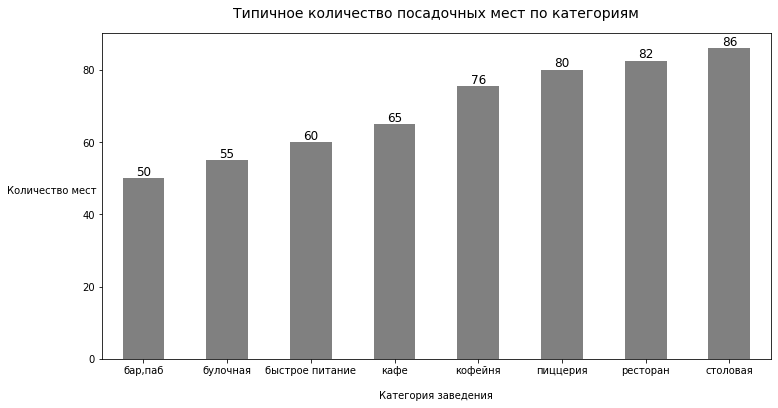

In [40]:
ax = all_seats['Медиана_с_выбросами'].sort_values().plot(
    kind='bar',
    figsize=(12, 6),
    color='gray'
)

ax.set_title('Типичное количество посадочных мест по категориям', fontsize=14, pad=15)
ax.set_xlabel('Категория заведения', labelpad=15)
ax.set_ylabel('Количество мест', labelpad=30,rotation=0)
ax.set_xticklabels(all_seats.index, rotation=0)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        fontsize=12,
        xytext=(0, 3),
        textcoords='offset points'
    )
plt.show()

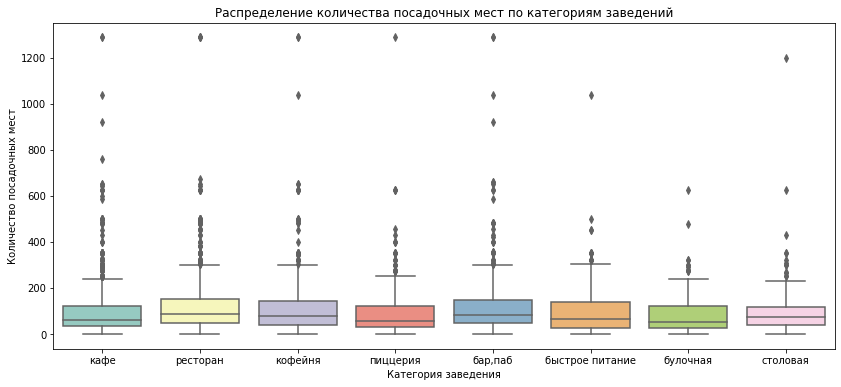

In [41]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    #data=df_info_price[df_info_price['seats'] < 300],
    data=df_info_price,
    x='category',
    y='seats',
    palette='Set3'
)

plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=0)
plt.show()

**В заведениях общепита принято иметь от 50 до 80 посадочных мест.**

**Для ресторанов и столовых чаще использут 80 мест.**

**Среднее значение без выбросов(размер "банкетный зал") для всех категорий варьируется от 76 до 96.**

---

### Задача 5

Исследуем рейтинг заведений.

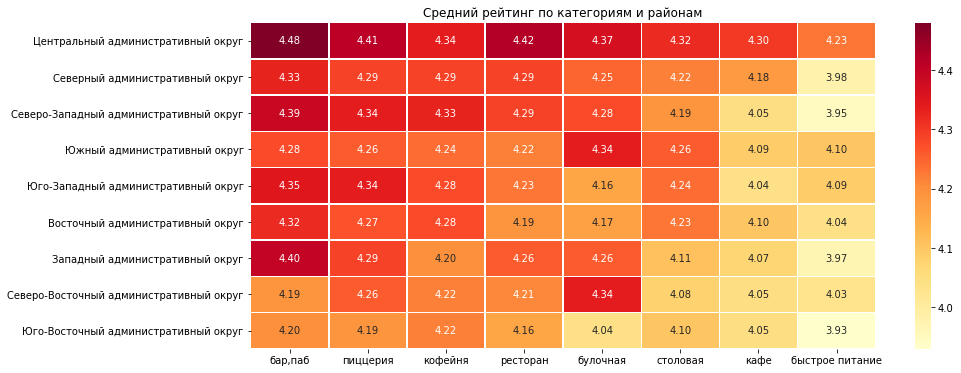

In [43]:
df_agg = df_info_price.groupby(['district','category'])['rating'].mean().round(2).unstack(fill_value=0)

# Отсортируем районы по Среднему значению средних рейтингов (вверху будет лучший район), сорт-ем категории (слева самая лучшая)
district_order = df_agg.mean(axis=1).sort_values(ascending=False).index
category_order = df_agg.mean(axis=0).sort_values(ascending=False).index
df_agg = df_agg.loc[district_order, category_order]

plt.figure(figsize=(14, 6))
sns.heatmap(data=df_agg, annot=True, fmt='.2f', linewidths=0.5, cmap='YlOrRd')

plt.title('Средний рейтинг по категориям и районам')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

**Выводы:**

- Самый слабый район: Юго-Восточный
- Самый сильный район: Центральный
- Самая слабая категория: Быстрое питание и Кафе
- Самый высокий рейтинг: Бар,паб в Центральном районе
- Из неожиданнгого: хороший рейтинг у Булочных в Северо-Восточном и Южном, Баров,пабов в Западном

In [44]:
rating_category = df_info_price.groupby('category')['rating'].mean().round(2).sort_values()
#df_rating_category = pd.DataFrame({'Тип заведения':rating_category.index, 'Количество':rating_category.values})

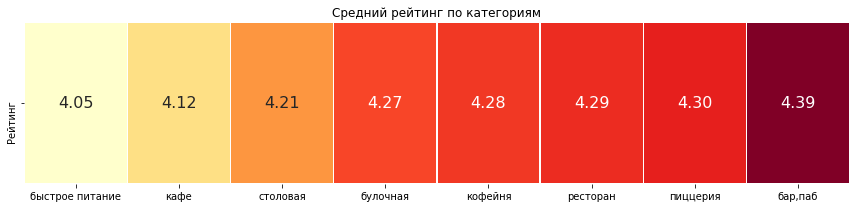

In [45]:
rating_category_df = rating_category.to_frame(name='Рейтинг')

plt.figure(figsize=(12, 3))
sns.heatmap(
    data=rating_category_df.T,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    linewidths=0.5,
    cbar=False,
    annot_kws={'size': 16}
)

plt.title('Средний рейтинг по категориям', fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**У баров,пабов во всех районах лучший рейтинг. Быстрое питание во всех районах имеет худший показатель, является единственно категорией с оценкой ниже 4.**

**Самый высокий рейтинг у баров,пабов в ЦАО. Самый низкий у быстрого питания в Юго-Восточном**

---

### Задача 6

С какими данными показывают самую сильную корреляцию рейтинги заведений?

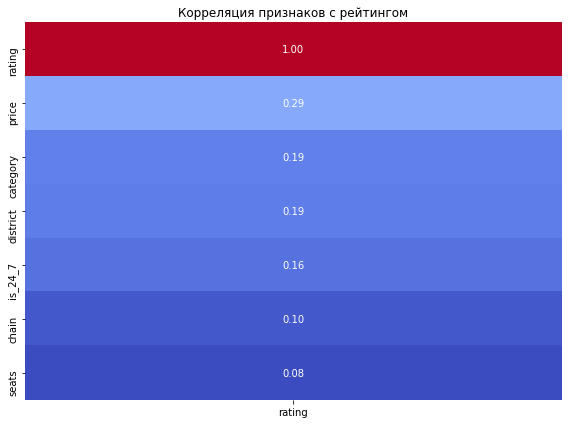

In [46]:
corr_columns = [
    'category',
    'district',
    'seats',
    'is_24_7',
    'price',
    'chain',
    'rating'
]
df_corr = df_info_price[df_info_price['seats'] < 300][corr_columns].copy()
phik_matrix = df_corr.phik_matrix(interval_cols=['seats', 'rating'])

plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix[['rating']].sort_values(by='rating', ascending=False),
            annot=True, fmt='.2f', cmap='coolwarm', cbar=False)

plt.title('Корреляция признаков с рейтингом')
plt.tight_layout()
plt.show()

In [47]:
order = ['низкие', 'средние', 'выше среднего', 'высокие']

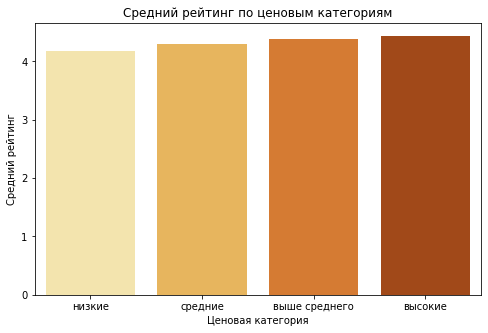

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_info_price,
    x='price',
    y='rating',
    estimator=np.mean,
    ci=None,
    palette='YlOrBr',
    order=order
)
plt.title('Средний рейтинг по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
plt.show()

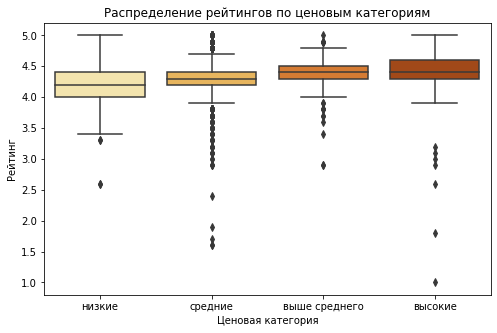

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_info_price,
    x='price',
    y='rating',
    palette='YlOrBr',
    order=order
)
plt.title('Распределение рейтингов по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.show()

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.

In [50]:
top_15 = df_info_price[df_info_price['name']!='кафе'].groupby(['name']).agg({
    'category':lambda x: x.mode()[0],
    'rating': 'mean', 
    'id': 'count'
})
top_15 = top_15.sort_values(by='id',ascending=False).head(15)
top_15.columns = ['Категория','Рейтинг','Количество']

In [51]:
top_15 

,Категория,Рейтинг,Количество
name,,,
шоколадница,кофейня,4.177193,114
домино'с пицца,пиццерия,4.170667,75
додо пицца,пиццерия,4.286486,74
one price coffee,кофейня,4.069444,72
яндекс лавка,ресторан,3.864179,67
cofix,кофейня,4.075385,65
prime,ресторан,4.116000,50
хинкальная,кафе,4.322727,44
шаурма,быстрое питание,3.909302,43


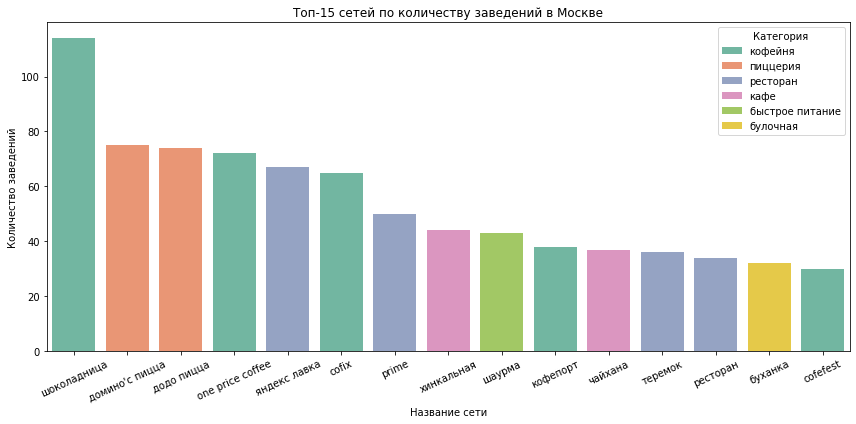

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_15.index, 
    y=top_15['Количество'], 
    hue=top_15['Категория'], 
    dodge=False,
    palette='Set2'
)
plt.xticks(rotation=25)
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.title('Топ-15 сетей по количеству заведений в Москве')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

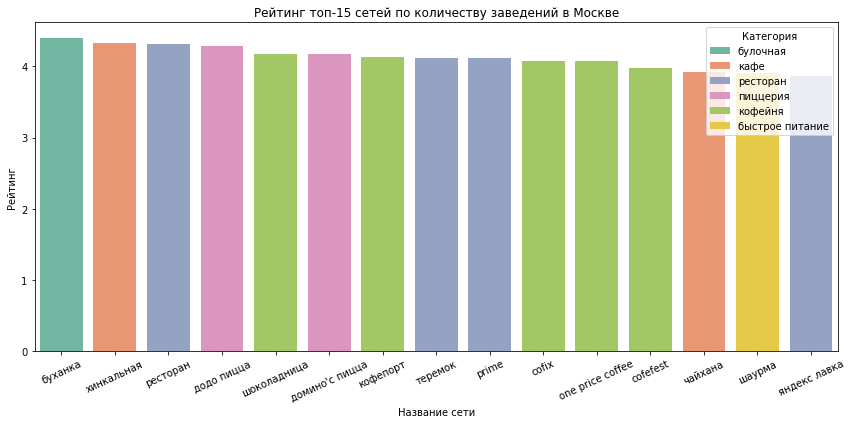

In [53]:
top_15 = top_15.sort_values(by='Рейтинг',ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_15.index, 
    y=top_15['Рейтинг'], 
    hue=top_15['Категория'], 
    dodge=False,
    palette='Set2'
)
plt.xticks(rotation=25)
plt.xlabel('Название сети')
plt.ylabel('Рейтинг')
plt.title('Рейтинг топ-15 сетей по количеству заведений в Москве')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

**Сети кофеен самые популярные (в топ_15 попало 5 кофеен), после них идут пиццерии. Лучший рейтинг оказался у булочной и хинкальной(кафе).**

---

### Задача 8

Вариации среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы.


<AxesSubplot:>

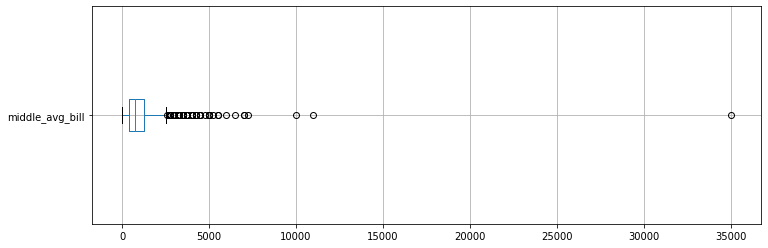

In [54]:
df_info_price.boxplot(column='middle_avg_bill',vert=False, figsize=(12, 4))

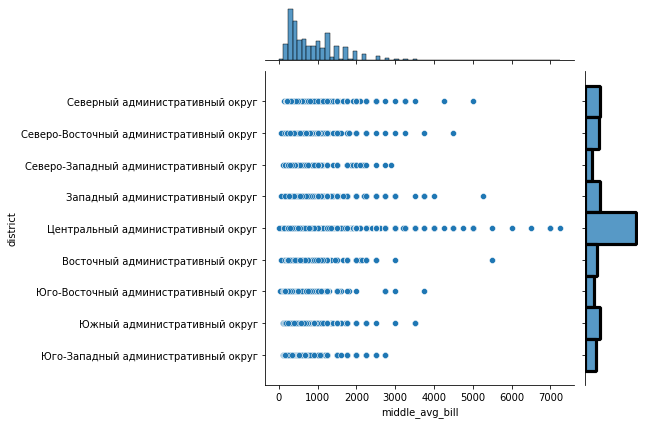

In [55]:
sns.jointplot(data=df_info_price[df_info_price['middle_avg_bill']<9000], x='middle_avg_bill', y='district')

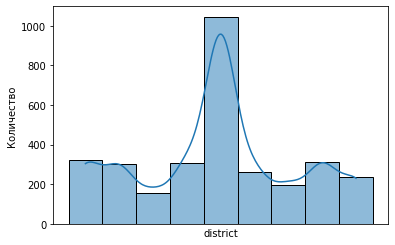

In [56]:
sns.histplot(data=df_info_price[pd.isna(df_info_price['middle_avg_bill'])==0], x='district', kde=True)

# Подписываем и отображаем график
plt.ylabel('Количество')
plt.xticks([]) 
plt.show()

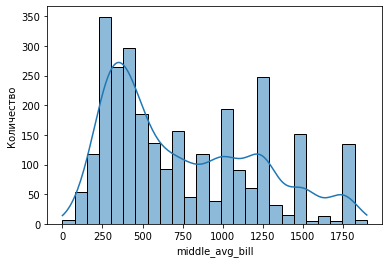

In [57]:
sns.histplot(data=df_info_price[df_info_price['middle_avg_bill']<2000], x='middle_avg_bill',bins=25, kde=True)

# Подписываем и отображаем график
plt.ylabel('Количество')
plt.show()

---


In [58]:
bill_district = df_info_price[df_info_price['middle_avg_bill']!=0].groupby('district')['middle_avg_bill'].agg(['min','max','count','mean','median', lambda x: x.mode()[0]])

In [59]:
bill_district = bill_district.rename(columns={bill_district.columns[5]: 'mode'})
bill_district.sort_values(by='mean',ascending=False)

,min,max,count,mean,median,mode
district,,,,,,
Центральный административный округ,67.0,7250.0,1045,1199.613397,1000.0,1250.0
Западный административный округ,50.0,5250.0,306,1053.225490,1000.0,1250.0
Северный административный округ,130.0,11000.0,321,929.292835,650.0,500.0
Южный административный округ,100.0,35000.0,314,834.398089,500.0,1250.0
Северо-Западный административный округ,120.0,2900.0,157,822.222930,700.0,1250.0
Восточный административный округ,50.0,10000.0,260,820.626923,575.0,1250.0
Юго-Западный административный округ,100.0,2750.0,235,792.561702,600.0,1250.0
Северо-Восточный административный округ,50.0,4500.0,300,715.666667,500.0,300.0
Юго-Восточный административный округ,30.0,3750.0,194,654.097938,450.0,300.0


**Большее количество информации по средним чекам мы имеем в ЦАО.**

**Средний чек большинства заведений в входит в диапазон от 250р до 500р**

**Можно выделить интересный локальный максимум приходящийся на 1250р. Что это за заведения и в каких районах?**

In [60]:
df_share= df_info_price[(df_info_price['middle_avg_bill']>1000) & (df_info_price['middle_avg_bill']<1400)].groupby('category')['id'].count().reset_index()
df_share.columns = ['district', 'count']
df_share['share_%'] = (df_share['count'] / df_share['count'].sum() * 100).round(2)
df_share

,district,count,share_%
0,"бар,паб",93,20.58
1,булочная,3,0.66
2,быстрое питание,4,0.88
3,кафе,87,19.25
4,кофейня,11,2.43
5,пиццерия,45,9.96
6,ресторан,207,45.80
7,столовая,2,0.44


In [61]:
df_share= df_info_price[(df_info_price['middle_avg_bill']>1000) & (df_info_price['middle_avg_bill']<1400)].groupby('district')['id'].count().reset_index()
df_share.columns = ['district', 'count']
df_share['share_%'] = (df_share['count'] / df_share['count'].sum() * 100).round(2)
df_share

,district,count,share_%
0,Восточный административный округ,33,7.30
1,Западный административный округ,59,13.05
2,Северный административный округ,40,8.85
3,Северо-Восточный административный округ,28,6.19
4,Северо-Западный административный округ,23,5.09
5,Центральный административный округ,176,38.94
6,Юго-Восточный административный округ,17,3.76
7,Юго-Западный административный округ,35,7.74
8,Южный административный округ,41,9.07


**Средний чек 1000-1400 преимущественно имеют рестораны в ЦАО**

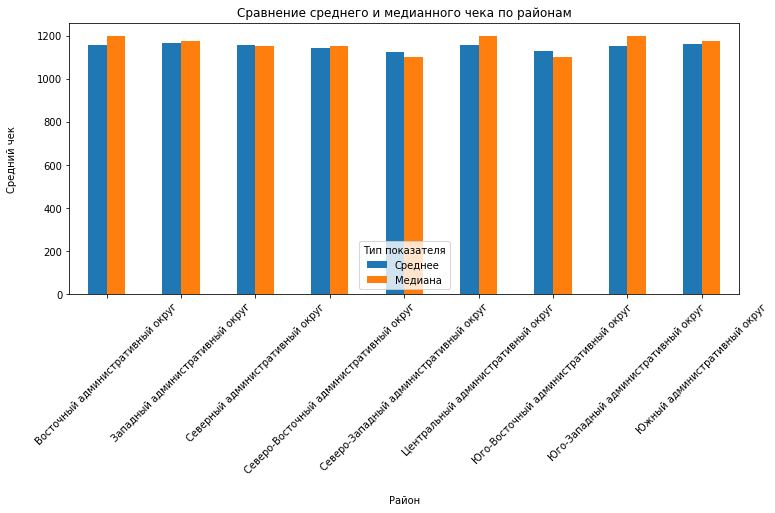

In [62]:

df_price_stats = (df_info_price[df_info_price['middle_avg_bill'].between(1000, 1400)].groupby('district')['middle_avg_bill'].agg(['mean', 'median']))
df_price_stats.plot(kind='bar',figsize=(12,5),rot=45)

plt.title('Сравнение среднего и медианного чека по районам')
plt.ylabel('Средний чек',labelpad=20)
plt.xlabel('Район', labelpad=20, rotation=0)
plt.legend(title='Тип показателя',labels=['Среднее','Медиана'])

plt.show()

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

- Половина рынка принадлежит категориям: кафе, рестораны.
- На ЦАО приходится значительное количество заведений(~20%). ЦАО имеет самые высокие рейтинги заведений по Москве.
- Несетевых почти в 2 раза больше чем сетевых заведений. Сетевыми чаще становятся кафе и рестораны.
- Среднее значение посадочных мест для всех категорий варьируется от 68 до 96.
- Средний чек большинства заведений в входит в диапазон от 250р до 500р

- Самый плохой рейтинг у заведений в Юго-Восточном районе.
- Самый плохой рейтинг у категорий: Быстрое питание и Кафе.
- Самый высокий рейтинг: Бар,паб в Центральном районе.

<a class="anchor" id="4-bullet"></a>
## 4. Итоговый вывод и рекомендации

**Общий обзор проделанной работы**

Основной целью ИАД являлось определить оптимальный тип заведения общественного питания в Москве и благоприятный район.

В ходе исследования проанализировали данные 8000 заведений общественного питания в Москве. Данные включали расположение, время работы, кол-во посадочных мест, средний чек, принадлежность к сети. Акцент исследования был на выявлении популярных категорий и исследовании рейтингов заведений в зависимости от района. Отдельный анализ сетевых заведений, их количество и распределения. Анализ посадочных мест категорий заведений.

**Главные выводы**

Несетевые заведения представляют большую часть рынкак - 62%

Кафе и рестораны доминирующие категории заведений - 52.6%, они же чаще являются сетевыми.

ЦАО лучший район по рейтингам заведений.

Юго-Восточный худший район по рейтингам заведений.

Бар,паб имеют лучший рейтинг - 4.49

Быстрое питание имеет худший рейтинг - 4.05

Неожиданные результаты: Хороший рейтинг у Булочных в Северо-Восточном и Южном, Баров,пабов в Западном.

Выделяющийся большой средний чек(1000-1400) имеют рестораны в Центральном районе

**Рекомендация по открытию заведения общественного питания:**

*Пиццерия* в любом районе кроме Юго-Восточного, идеально в Центральном, надо смотреть по возможностям.

*Пиццерий* значительно меньше чем других категорий ~8% от общего числа по Москве. Меньше конкурентов. Если рассматривать популярность сетей, то *пиццерии* входят в топ_15. То есть большую часть количества *пиццерий* представляют 2 крупные компании, остальные значительно им уступают и только набирают охваты. Стоит проверить возможную монополию на рынке - провести дополнительный анализ. И предположить стратегию развития в этом случае.

Средний рейтинг *пиццерий*(=4.40) лишь на 0.09 уступает первому месту - *бар,паб*(=4.49), являясь второй категорией с лучшим показателем рейтинга.

*Бар,паб* показали хорошие рейтинги во всех районах и так же являются малочисленной категорией(~16%), но не попали в топ_15 популярных заведений. Если заказчик планирует в перспективе расширять франшизу, эта категория не показала себя работоспособной в этом направлении.

Если расширение не планируется и хочется начать с одной точки общественного питания, стоит присмотреться к категории *ресторан в Центральном районе*. Они имеют отличный рейтинг(4.42), в перспективе могут стать сетевым заведением. Их преимущество перед *барами,пабами* , которые занимают первое место в нескольких таблицах анализа, заключается в большом среднем чеке(1000-1400). Это их выделяет на фоне остальных вариантов заведений.